#Import Libraries and Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, f1_score, roc_curve, auc

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

##Making a DataFrame

In [ ]:

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


##View Data

In [ ]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
#Get Data Dictionary to understand the Data
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##Data Types View

In [ ]:
#Check Data Types to make sure all is in order
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

* All datatypes are float and our target is an integer.
* target will be changed to category


###Changing target to Category - type

In [ ]:

df['target'] = df['target'].astype('category')

# Display the DataFrame to see the change
print(df['target'].dtype)


category


##Missing Values

In [ ]:
df.isnull().sum() #null

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
df.isna().sum() #na

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No missing values found in the data for isnull and isna

## Shape of the dataframe

In [ ]:
df.shape #rows, columns

(569, 31)

# Univariate, Bivariate, and Multivariate analysis

#Univariate

## Basic histogram

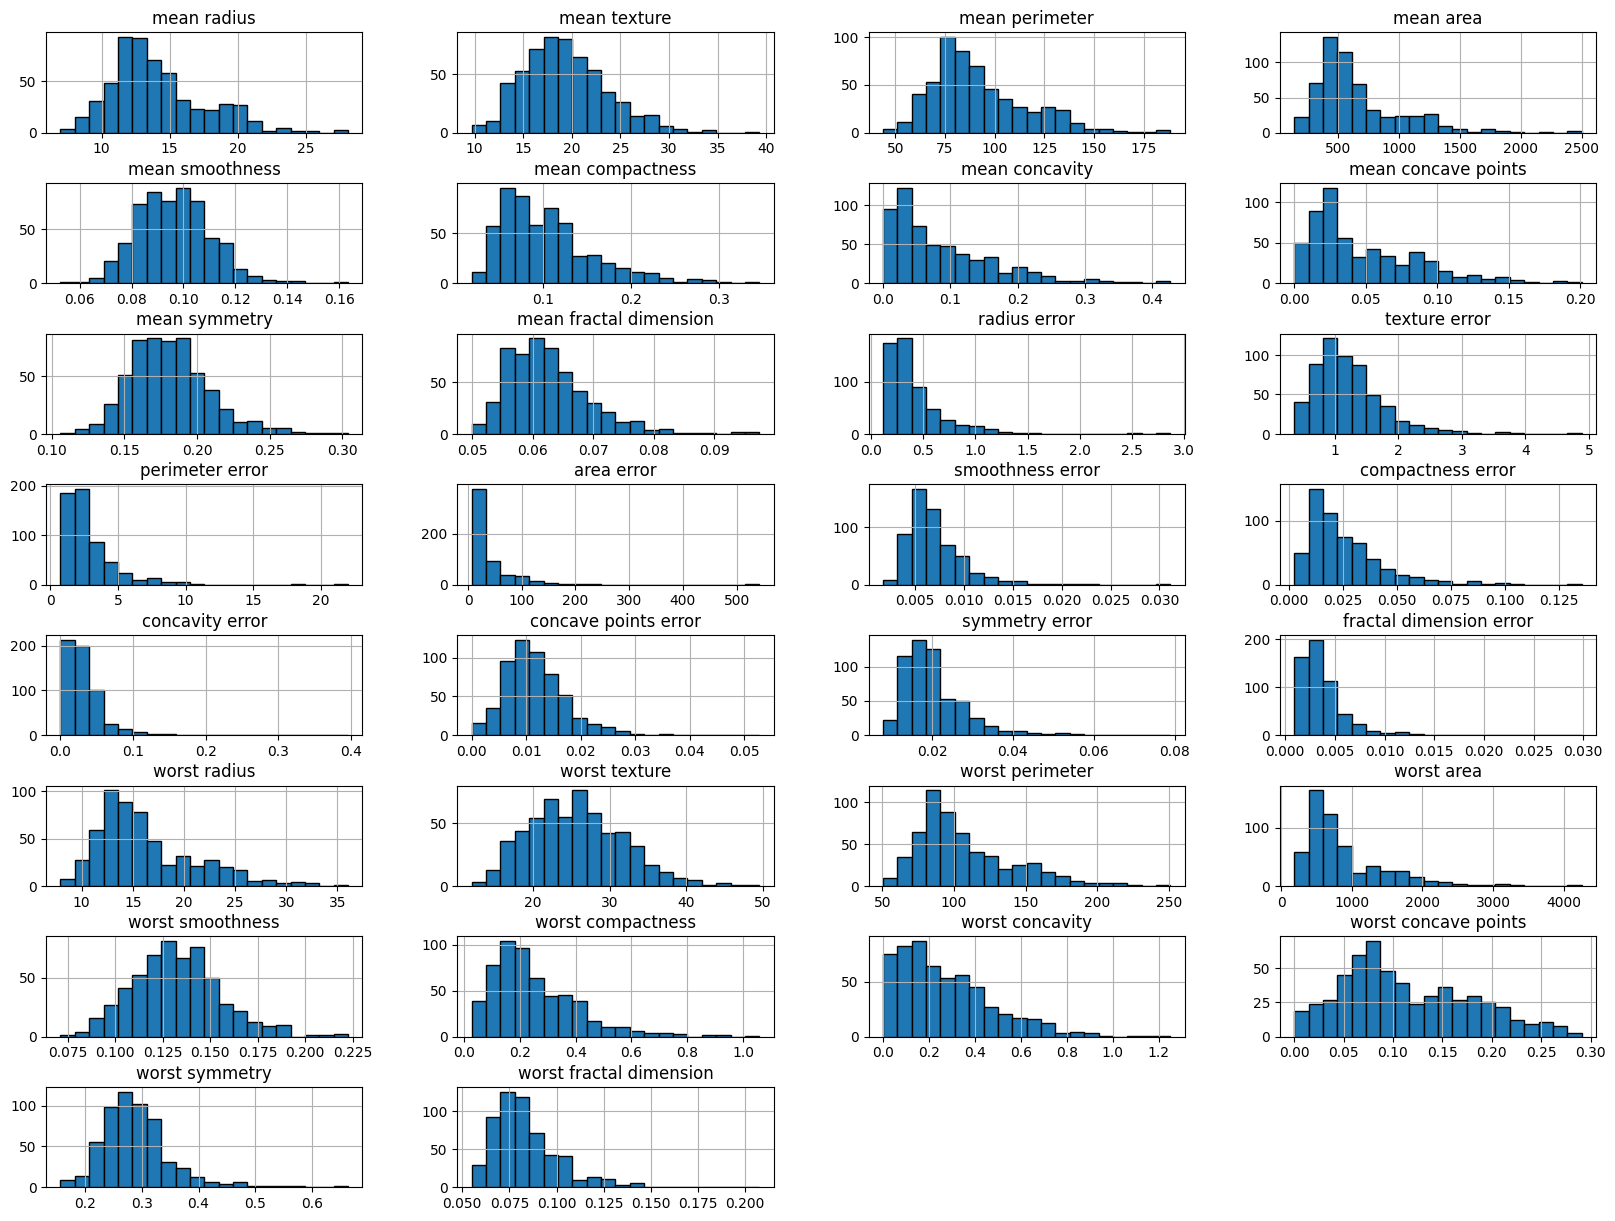

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for all columns
df.hist(bins=20, figsize=(20, 15), layout=(-1, 4), edgecolor='black')  # Adjust layout as needed

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots
plt.show()


* Worst Symmetry has a normal distribution
* Concavity error has a right skewed distribution
* Worse area has a right skewed distribution

##Boxplots

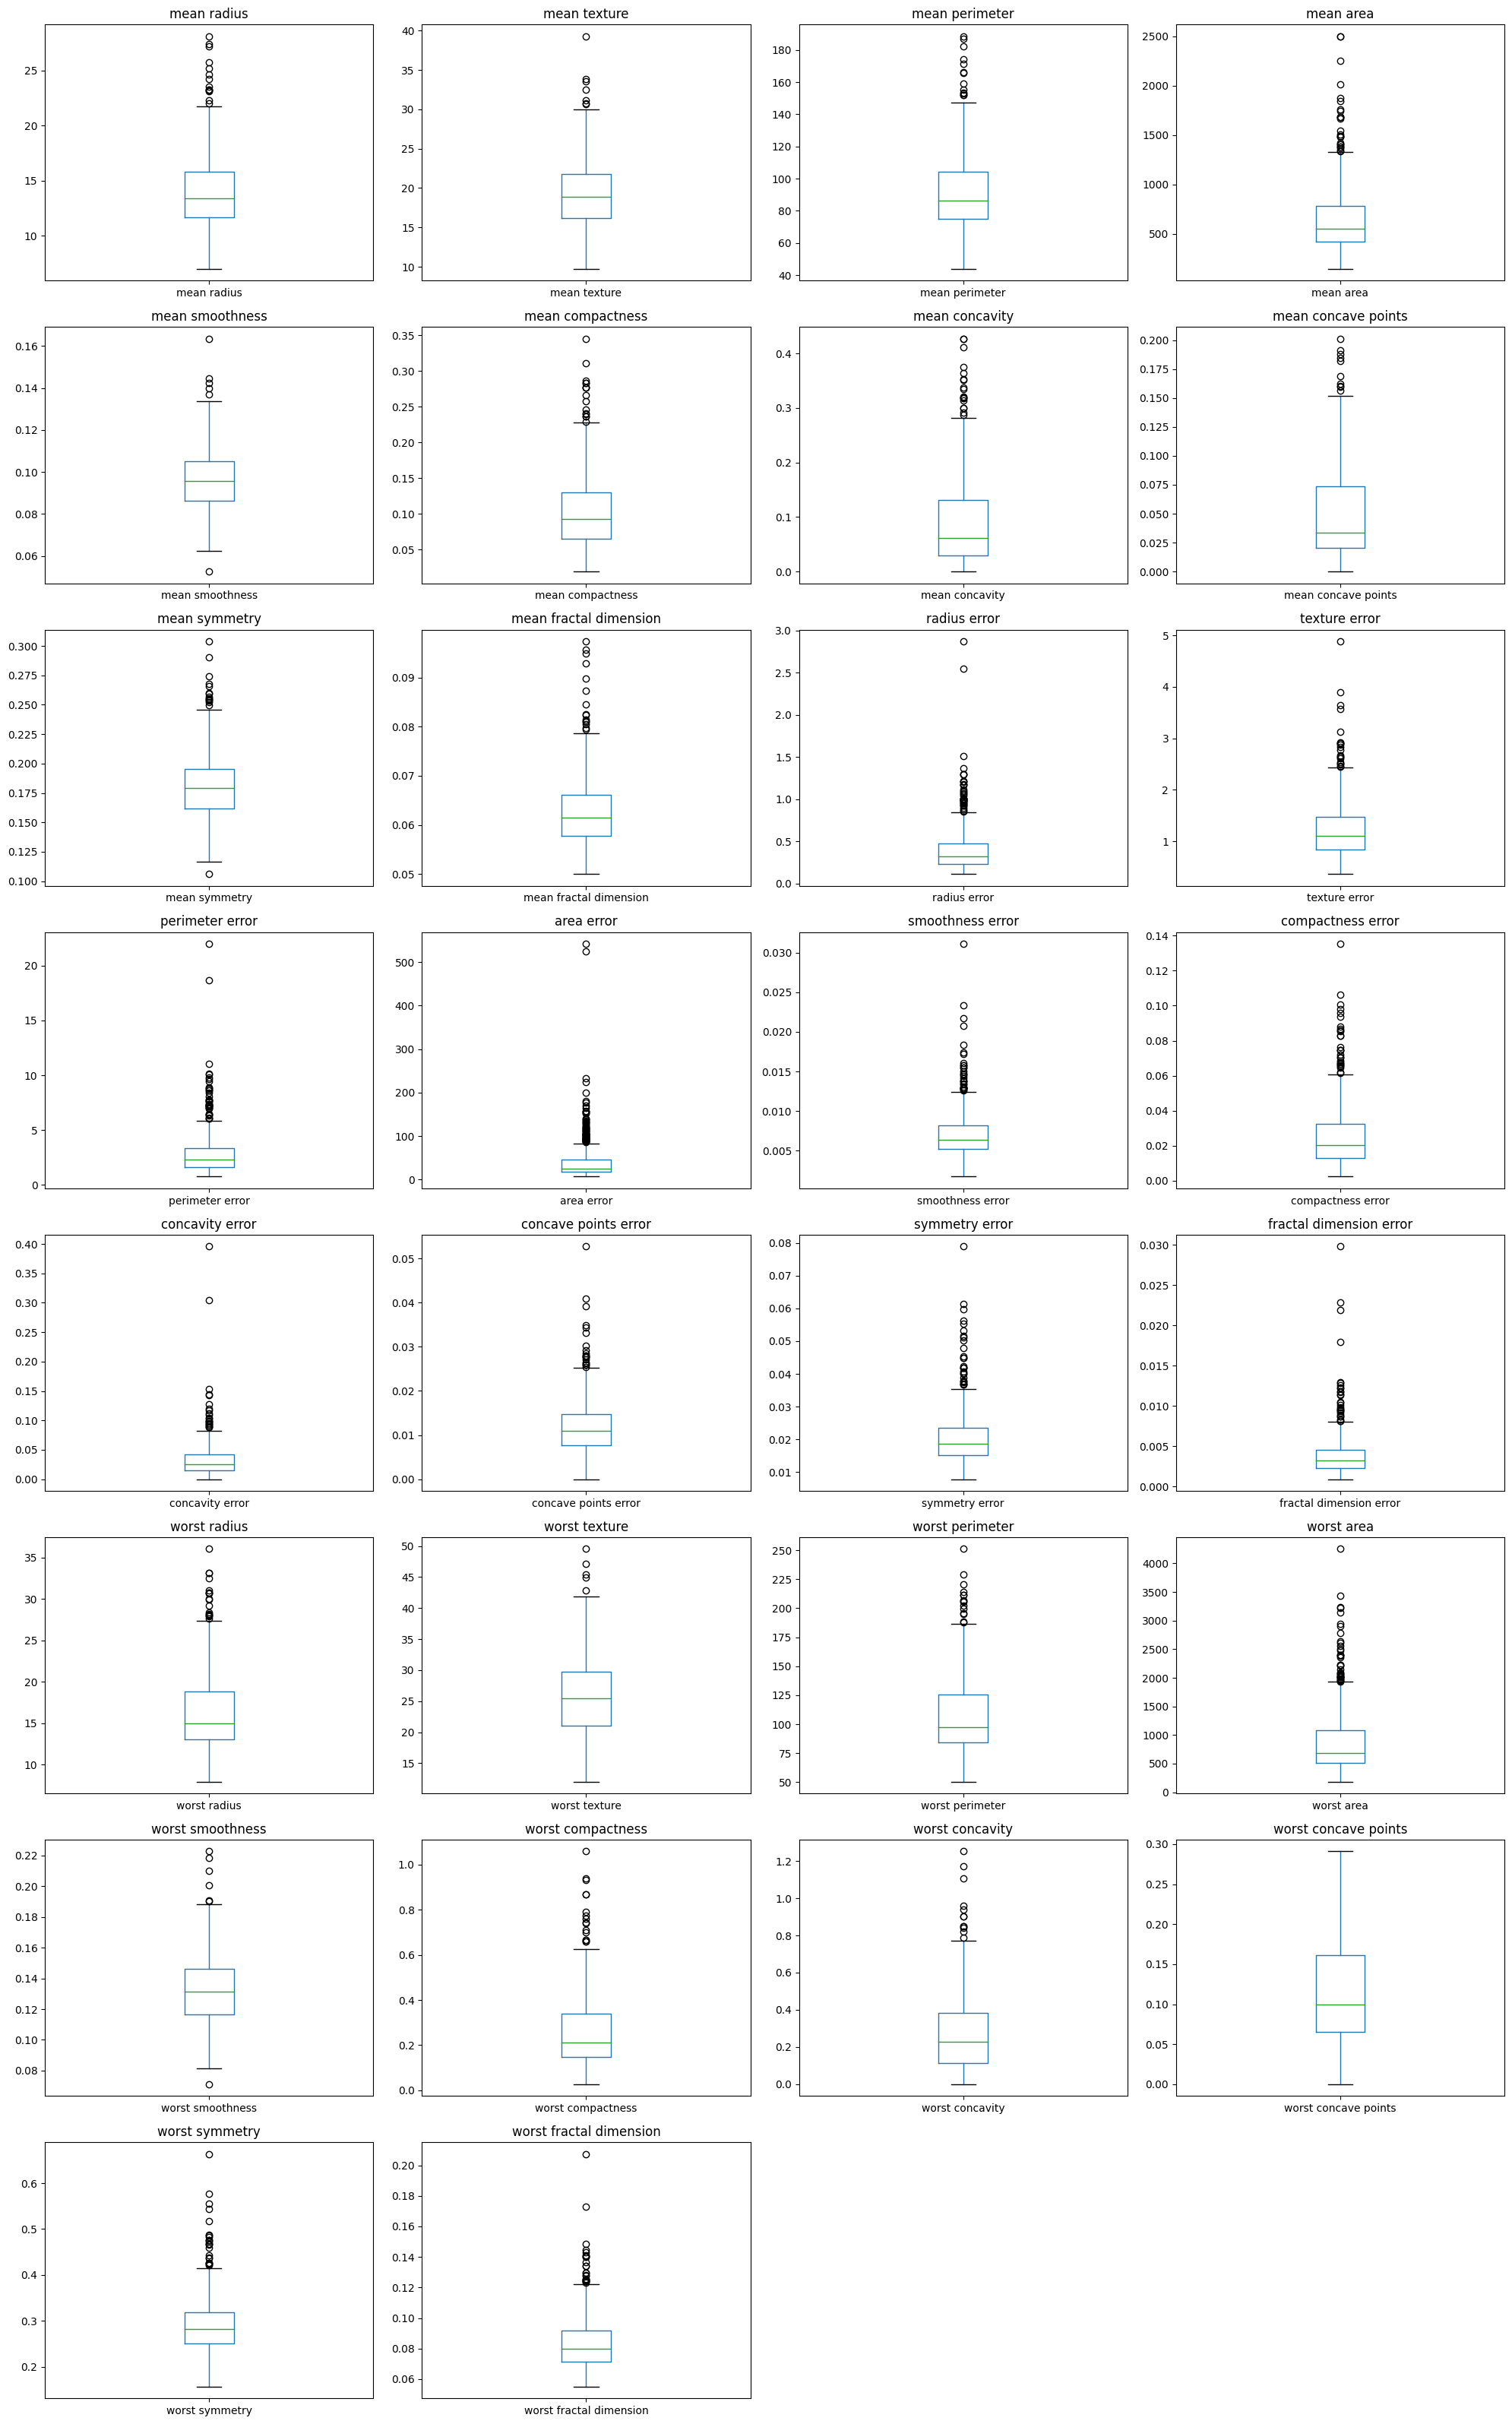

In [ ]:
# Plot boxplots for all columns
num_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns for boxplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate the required number of rows based on the number of columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

for i, col in enumerate(num_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]
    df.boxplot(column=col, ax=ax, grid=False)  # Plot boxplot
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

# If the number of numeric columns is not a multiple of n_cols, hide the empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()


The data has many outliers but they will be kept in the data as they are found valuable.

#Bivariate Analysis

<ipython-input-403-07efa08ac00a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


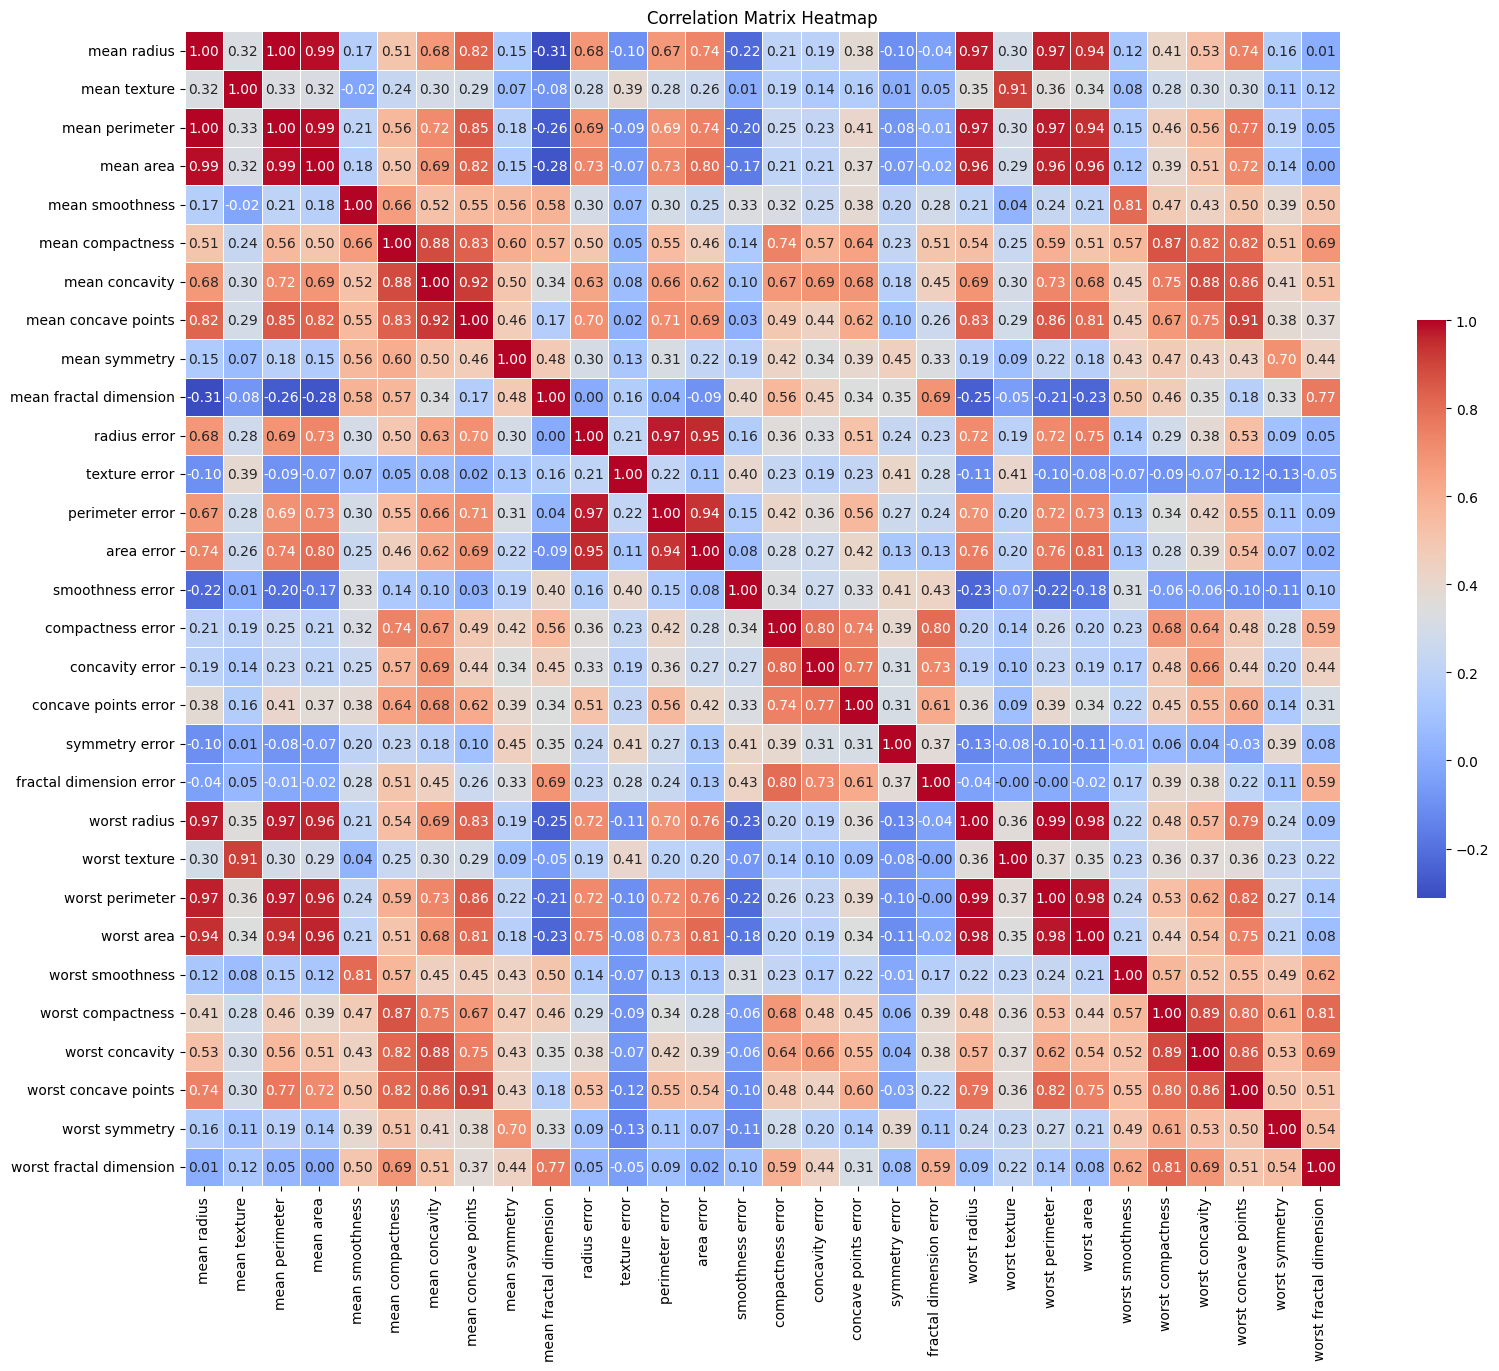

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(20, 15)) # Adjust the size of the figure as necessary
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'shrink': .5}, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



* Worst perimeter has a high correlation with mean area
* Worst area has a high correlation with mean radius
* Worst concave points has a strong correlation with mean radius

##Multivariate Analysis

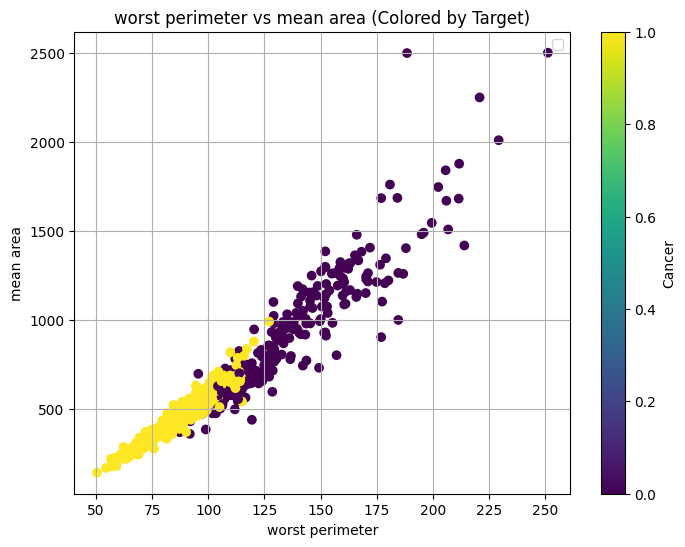

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['worst perimeter'], df['mean area'], c=df['target'], cmap='viridis')
plt.xlabel('worst perimeter')
plt.ylabel('mean area')
plt.title('worst perimeter vs mean area (Colored by Target)')
plt.colorbar(label='Cancer')
plt.grid(True)
plt.legend()
plt.show()

The data is in evident clusters which is good

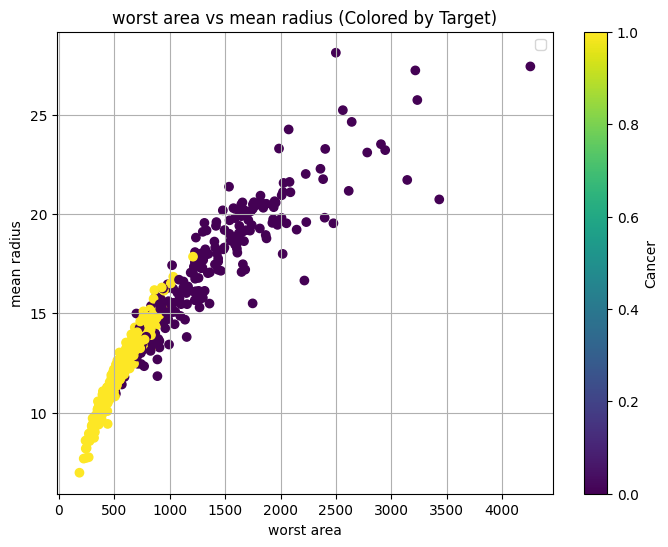

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['worst area'], df['mean radius'], c=df['target'], cmap='viridis')
plt.xlabel('worst area')
plt.ylabel('mean radius')
plt.title('worst area vs mean radius (Colored by Target)')
plt.colorbar(label='Cancer')
plt.grid(True)
plt.legend()
plt.show()

Although there is some mix, the data is in different clear clusters

#Baseline Logistic Regression

In [ ]:

# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


##Confusion Matrix

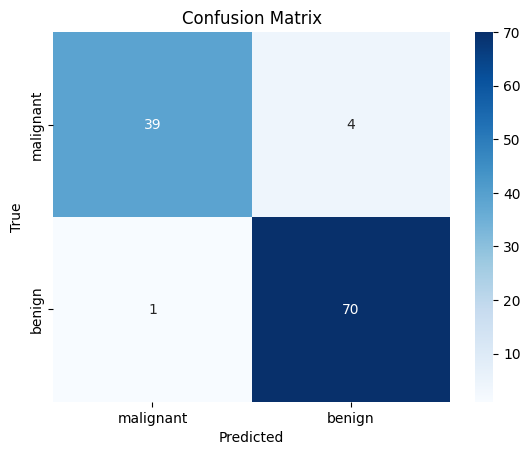

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.9526381387619443


#Data Transformation

In this case, we are standardizing

In [ ]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

df1 = df.drop('target', axis=1)

# Standardize the DataFrame
df2 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

df2['target'] = data.target

# Print the standardized DataFrame
df2.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


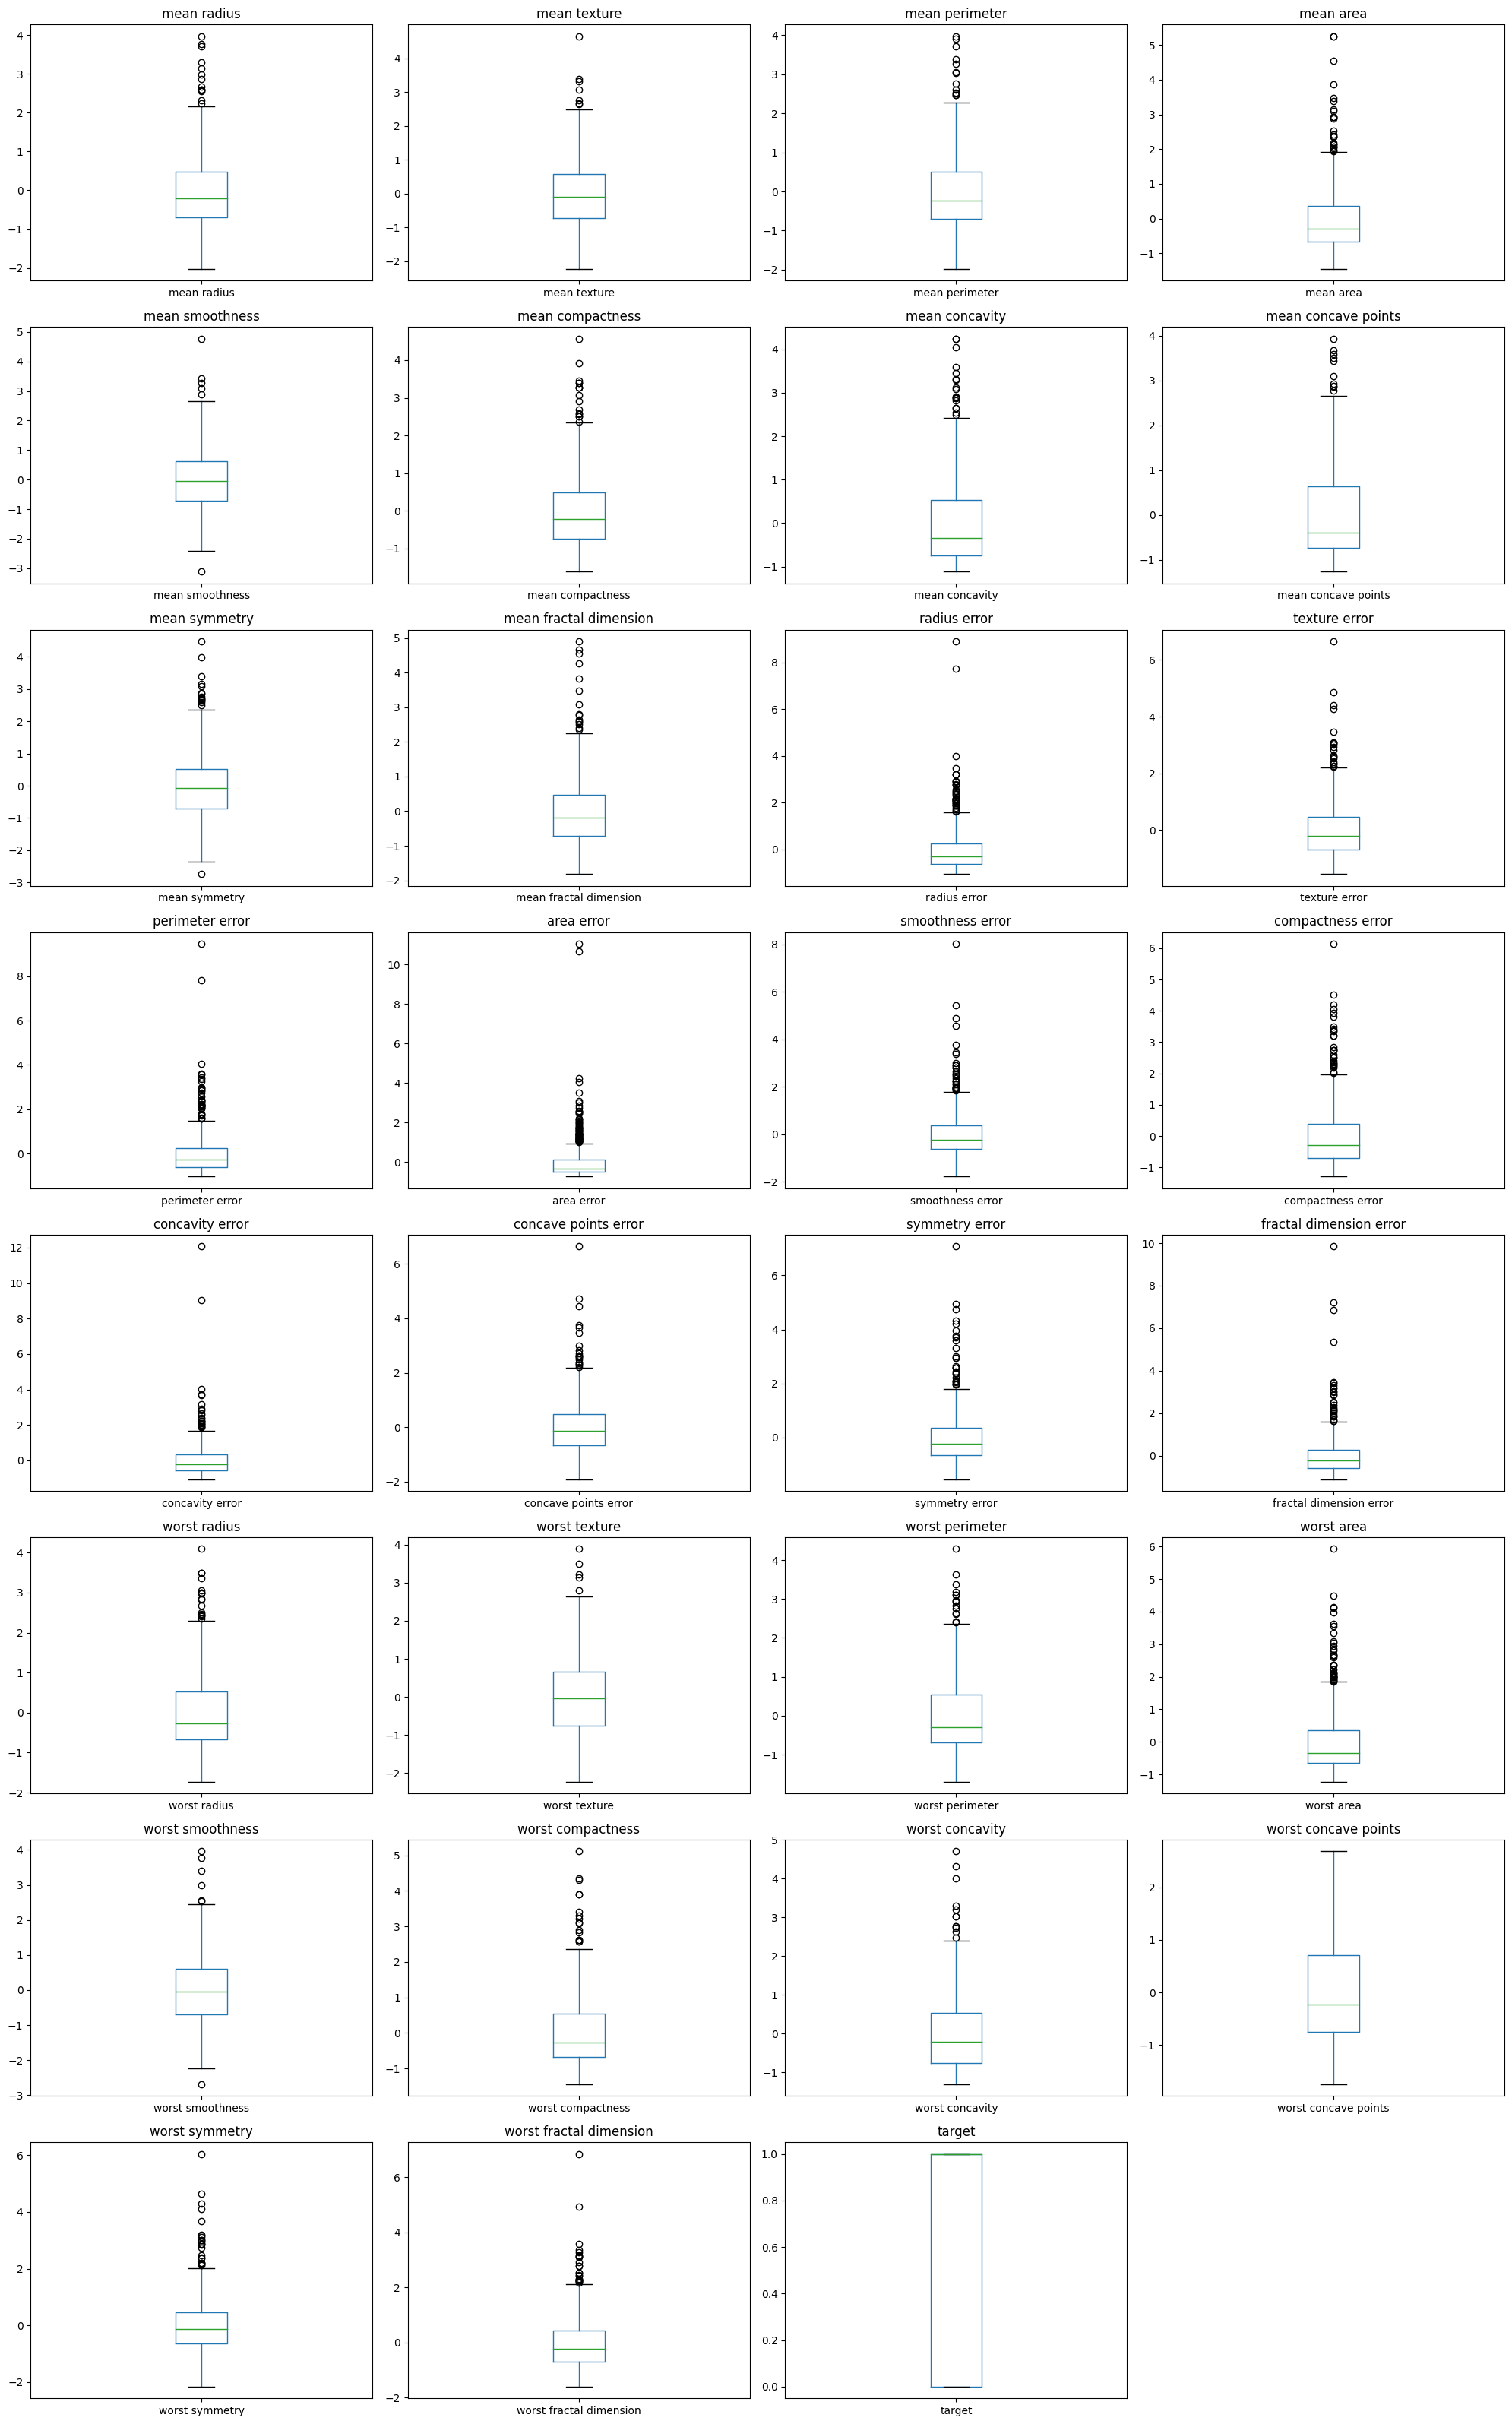

In [ ]:
# Plot boxplots for all columns
num_cols = df2.select_dtypes(include=['number']).columns  # Select only numeric columns for boxplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate the required number of rows based on the number of columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

for i, col in enumerate(num_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]
    df2.boxplot(column=col, ax=ax, grid=False)  # Plot boxplot
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

# If the number of numeric columns is not a multiple of n_cols, hide the empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

#2nd Regression K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply k-best feature selection
k = 10  # Number of features to select
k_best = SelectKBest(score_func=chi2, k=k)
X_new = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Print the selected feature names
selected_features = [data.feature_names[i] for i in selected_indices]
print("Selected features:", selected_features)


Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


* K Best 10 Selected Features.
* Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']

In [ ]:

# Split the data into features (X) and target variable (y)
X = df2[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']]
y = df2['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


##Confusion Matrix

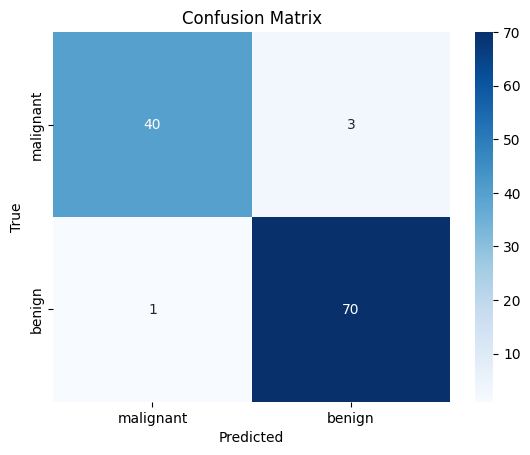

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.9623015873015873


# LASSO & KBest 3rd regression

In [ ]:
from sklearn.datasets import load_wine
from sklearn.linear_model import Lasso

# Apply LASSO regression
lasso = Lasso(alpha=0.1)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X, y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean concave points', 'mean symmetry']


In [ ]:
# Split the data into features (X) and target variable (y)
X = df2[['mean concave points', 'mean symmetry']]
y = df2['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8859649122807017


##Confusion Matrix

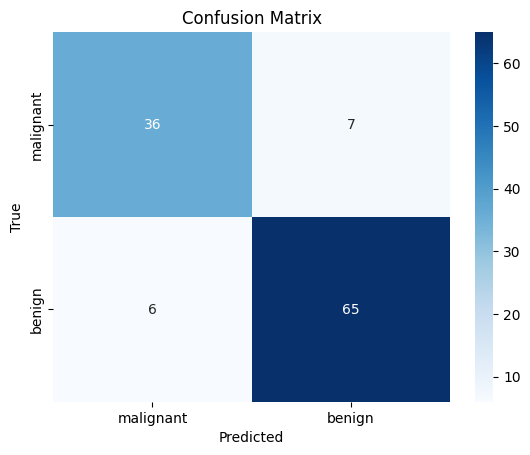

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.8780748663101605


#Regression Comparison

* Baseline - 95.6%
* 2nd Regression - 96.5%
* 3rd Regression - 88.6%